<a href="https://colab.research.google.com/github/rajeev-shivaram/PyTorch101/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perceptron is a single layered neural network
Fundamentally, the basic form of a neural network

What differneciates them from human cells is a technique called back propogation

In [0]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

Plan of Action:
1. Use Sklearn to create a linearly seperable dataset
2. Create a perceptron based NN using torch to train and fit our dataset such that it's a ble to sperate our dataset into two discrete classes.

In [0]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)

# make_blobs:= generates a numpy
# random_state:=sets the seed for sampling.
# centers:= indicate the center point of clusters we want to create.
# cluster_std:= std.deviation of clustered points around center.
# 0 causes points to be generated @ the center point, as value increases the generated points deviate from center

# Also converting them into tensor type from numpy
x_data = torch.Tensor(X)
y_data = torch.Tensor(y).reshape([100, 1])

In [0]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1]) # plots points have y:label as 0
  plt.scatter(X[y==1, 0], X[y==1, 1]) # plts points have y:label as 1 

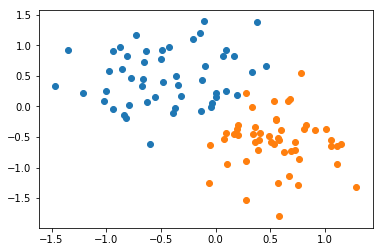

In [4]:
scatter_plot()

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred
  def predict(self, x):
    pred = model.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [36]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [7]:
def get_params():
  [w, b] = model.parameters()
  w1, w2 = w.view(2)
  b0 = b[0]
  return(w1.item(), w2.item(), b0.item())

get_params()

(0.16220331192016602, -0.1682732105255127, 0.19390898942947388)

In [0]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  
  x1 = np.array([-2.0, 2.0])
  
  # Derived equ of line
  # 0 = w1*x1 + w2*x2 + b1
  x2 = (w1*x1 + b1) / (-w2)
  
  plt.plot(x1, x2, 'r')
  scatter_plot()
  

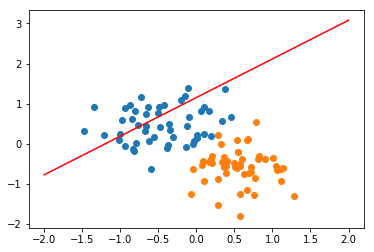

In [9]:
plot_fit('INIT MODEL')

In [18]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model(x_data)
  loss = criterion(y_pred, y_data)
#  print("epoch:", i, "loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
print("Loss:", losses[-1])

Loss: 0.0980672612786293


Text(0, 0.5, 'Loss')

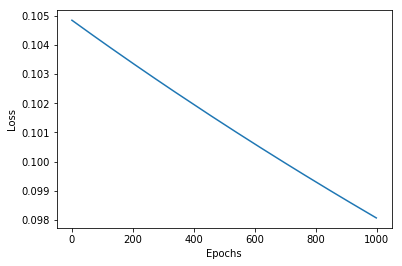

In [19]:
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')

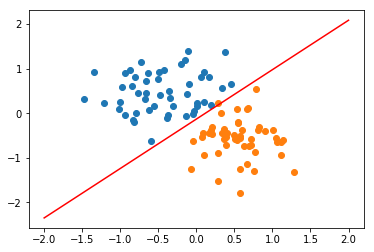

In [20]:
plot_fit('Trained Model')

Red   is of Class 1
Black is ofClass 0


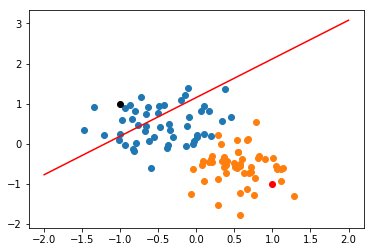

In [39]:
# Testing the model
point1 = torch.tensor([1.0, -1.0])
point2 = torch.tensor([-1.0, 1.0])

# plot the points on the plot
plt.plot(point1[0].item(), point1[1].item(), 'ro')
plt.plot(point2[0].item(), point2[1].item(), 'ko')
# print(f'Prob of Red point:{model(point1).item()}')
# print(f'Prob of Black point:{model(point2).item()}')
plot_fit('Trained Model')

print(f'Red   is of Class {model.predict(point1)}')
print(f'Black is ofClass {model.predict(point2)}')